In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


In [3]:
df=pd.read_csv('Constraint_Train (1).csv')

In [4]:
df.head

<bound method NDFrame.head of         id                                              tweet label
0        1  The CDC currently reports 99031 deaths. In gen...  real
1        2  States reported 1121 deaths a small rise from ...  real
2        3  Politically Correct Woman (Almost) Uses Pandem...  fake
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4        5  Populous states can generate large case counts...  real
...    ...                                                ...   ...
6415  6416  A tiger tested positive for COVID-19 please st...  fake
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...  fake
6417  6418  _A post claims a COVID-19 vaccine has already ...  fake
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund  fake
6419  6420  It has been 93 days since the last case of COV...  real

[6420 rows x 3 columns]>

In [5]:
df.drop(['id'],axis =1)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real
...,...,...
6415,A tiger tested positive for COVID-19 please st...,fake
6416,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,_A post claims a COVID-19 vaccine has already ...,fake
6418,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [6]:
df['label'] = df['label'].map({'real': 1, 'fake': 0})

In [7]:
print(df)

        id                                              tweet  label
0        1  The CDC currently reports 99031 deaths. In gen...      1
1        2  States reported 1121 deaths a small rise from ...      1
2        3  Politically Correct Woman (Almost) Uses Pandem...      0
3        4  #IndiaFightsCorona: We have 1524 #COVID testin...      1
4        5  Populous states can generate large case counts...      1
...    ...                                                ...    ...
6415  6416  A tiger tested positive for COVID-19 please st...      0
6416  6417  ???Autopsies prove that COVID-19 is??� a blood...      0
6417  6418  _A post claims a COVID-19 vaccine has already ...      0
6418  6419  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund      0
6419  6420  It has been 93 days since the last case of COV...      1

[6420 rows x 3 columns]


In [8]:
def wordopt(tweet):
    tweet = tweet.lower()
    tweet = re.sub('\[.*?\]', '',tweet)
    tweet = re.sub("\\W"," ",tweet)
    tweet = re.sub('http?://\S+|www.\.\S+','',tweet)
    tweet = re.sub('<.*?>+','',tweet)
    tweet = re.sub('[%s]'% re.escape(string.punctuation),'',tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '',tweet)
    return tweet

In [9]:
df['tweet'] =df['tweet'].apply(wordopt)

In [10]:
x = df['tweet']
y = df['label']

In [78]:
print(df.groupby([y]).size())

label
0    3060
1    3360
dtype: int64


<Axes: xlabel='label', ylabel='count'>

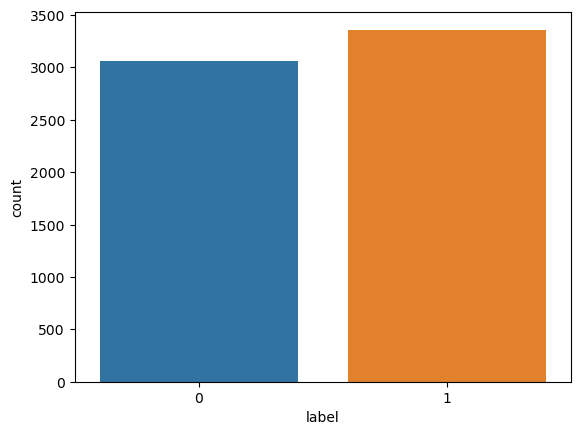

In [72]:
sns.countplot(x="label",data =df)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
DT = DecisionTreeClassifier()

In [20]:
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [21]:
pred_dt = DT.predict(xv_test)

In [60]:
acc_dt=DT.score(xv_test, y_test)

In [23]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       625
           1       0.87      0.87      0.87       659

    accuracy                           0.87      1284
   macro avg       0.87      0.87      0.87      1284
weighted avg       0.87      0.87      0.87      1284



In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [26]:
pred_gb = GB.predict(xv_test)

In [57]:
acc_gb=GB.score(xv_test,y_test)

In [28]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       625
           1       0.87      0.89      0.88       659

    accuracy                           0.88      1284
   macro avg       0.88      0.88      0.88      1284
weighted avg       0.88      0.88      0.88      1284



In [34]:
from sklearn.naive_bayes import MultinomialNB


In [35]:
nb_class = MultinomialNB()
nb_class.fit(xv_train,y_train)

MultinomialNB()

In [36]:
pred_nb = nb_class.predict(xv_test) 

In [61]:
acc_nb=nb_class.score(xv_test,y_test)

In [62]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.80      0.88       625
           1       0.84      0.97      0.90       659

    accuracy                           0.89      1284
   macro avg       0.90      0.89      0.89      1284
weighted avg       0.90      0.89      0.89      1284



In [65]:
print(acc_nb)
print(acc_gb)
print(acc_dt)

0.8886292834890965
0.8769470404984424
0.8691588785046729


In [54]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_nb = nb_class.predict(new_xv_test)

    return print("\nDT Prediction: {} \nGB Prediction: {} \nNB Prediction: {}".format( output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GB[0]), 
                                                                                                              output_lable(pred_nb[0])))

In [55]:
news = str(input())
manual_testing(news)

 A high temperature is 37.8C or above, and can happen when the body is fighting off any infection - not just coronavirus.

DT Prediction: Fake News 
GB Prediction: Fake News 
NB Prediction: Fake News


In [71]:
news =  str(input())
manual_testing(news)

A high temperature is 37.8C or above, and can happen when the body is fighting off any infection - not just coronavirus.


NB Prediction: Fake News 
LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [72]:
news =  str(input())
manual_testing(news)

But many of the countries that have done well are those that have learned from previous outbreaks like SARS MERS H1N1 Ebola &amp; others. That â€œmuscle memoryâ€ has prepared them for this pandemic. Now the whole world must develop the same muscle memory-@DrTedros #AWorldInDisorder


NB Prediction: Not A Fake News 
LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
